In [1]:
import numpy as np
from typing import Tuple, Callable, Optional
from matplotlib import pyplot as plt

### Exercicio 1

> Escreva uma função cuja entrada sejam duas matrizes, $A$ e $B$, e a saída seja a matriz resultante do produto das entradas.
> Não utilize nenhuma função de multiplicação de matrizes pronta, faça você mesmo os loops necessários para a multiplicação.
> Coloque uma mensagem de erro quando o número de colunas de $A$ não for igual ao número de linhas de $B$. > Utilize as arrays do numpy.

In [2]:
def verifica_se_eh_matriz(M: np.ndarray):
    if not isinstance(M, np.ndarray):
        raise TypeError(f"O parametro recebido deve ser um numpy.ndarray. Nao {type(M)}")
    if M.ndim != 2:
        raise ValueError(f"O parametro recebido deve ser uma matriz 2D. Recebido {M.ndim}D")
    
    
def multiplica_matriz(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    verifica_se_eh_matriz(A)
    verifica_se_eh_matriz(B)
    n, p = A.shape
    q, m = B.shape
    if p != q:
        raise ValueError(f"Nao pode multiplicar. A e B tem formatos {A.shape} e {B.shape}")
    M = np.zeros((n, m), dtype="float64")  # Matriz resultado
    for i in range(n):
        for j in range(m):
            for k in range(p):
                M[i, j] += A[i, k] * B[k, j]
    return M

def test_multiplica_matriz(ntests = 100):
    for i in range(ntests):
        n, m, p= np.random.randint(4, 11, size=3)
        A = 4*np.random.rand(n, p) - 2
        B = 4*np.random.rand(p, m) - 2
        Cgood = np.dot(A, B)  # Valor verdadeiro, calculado pelo proprio numpy
        Ctest = multiplica_matriz(A, B)  # Resultado na nossa funcao
        np.testing.assert_equal(Ctest, Cgood)  # Compara pra ver se o resultado da funcao eh bom

### Exercício 2

> Crie uma função que tenha como entrada uma matriz qualquer $M \times N$ e como saída a média e o desvio padrão dos elementos dessa matriz

In [3]:
def calcula_media_desvio(A: np.ndarray) -> Tuple[float, float]:
    verifica_se_eh_matriz(A)
    M, N = A.shape
    soma = 0
    for i in range(M):
        for j in range(N):
            soma += A[i, j]
    media = soma/(M*N)
    somaquad = 0
    for i in range(M):
        for j in range(N):
            somaquad += (A[i, j] - media)**2
    variancia = somaquad/(M*N)
    desvio = np.sqrt(variancia)
    return media, desvio

def test_calcula_medio_desvio(ntests: int = 100):
    for i in range(ntests):
        M, N = np.random.randint(4, 11, size=2)
        A = 4*np.random.rand(M, N) - 2
        mtest, dtest = calcula_media_desvio(A)
        mgood = np.mean(A)
        dgood = np.std(A)
        np.testing.assert_almost_equal(mtest, mgood)
        np.testing.assert_almost_equal(dtest, dgood)

test_calcula_medio_desvio()

### Exercício 3

> Crie uma matriz $N \times N$ de números aleatórios com valores entre $−2$ e $2$.
> Utilize a função do exercício anterior para calcular a média e o desvio padrão dos elementos dessa matriz.
> O que acontece com esses valores quando $N \to \infty$?
> 
> Dica: o numpy tem uma função que gera números aleatórios

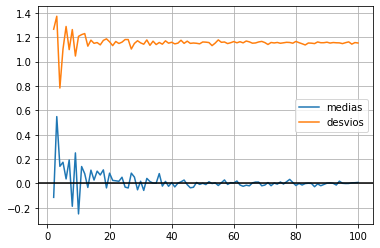

In [4]:
Ns = np.arange(2, 101)
medias = np.zeros(Ns.shape)
desvios = np.zeros(Ns.shape)
for i, N in enumerate(Ns):
    A = 4*np.random.rand(N, N)-2
    m, d = calcula_media_desvio(A)
    medias[i] = m
    desvios[i] = d

plt.plot(Ns, medias, label="medias")
plt.plot(Ns, desvios, label="desvios")
plt.axhline(y=0, color="k")
plt.legend()
plt.grid()
plt.show()

### Exercício 4

> Desenvolva um programa que pede o nome e a idade do usuário (use a função ```input```) e imprime esses valores em um arquivo texto de saída.
> Depois desenvolva um programa para ler os dados desse arquivo texto e imprimir o resultado na tela.
> 
> **Observação**: a variável obtida a partir da função ```input``` é sempre do tipo ```string```.
> Se você quiser utilizar o valor de entrada como ```int``` ou ```float``` você tem que fazer a conversão.

In [5]:
while True:
    nome = input("Digite seu nome")
    if len(nome) > 2:
        break
print(f"Nome lido = {nome}")

while True:
    idade = input("Digite sua idade")
    try:
        idade = int(idade)
        break
    except ValueError as e:
        print("Sua idade é invalida! Digite um inteiro!")
print(f"Idade lida = {idade}")

print("Salvando no arquivo!")
filename = "myfile.txt"
with open(filename, "w") as file:
    file.write(nome + "\n")
    file.write(str(idade))

print("Lendo o arquivo!")
with open(filename, "r") as file:
    lines = file.readlines()
nome_arquivo = lines[0].replace("\n", "")
idade_arquivo = int(lines[1])
print(f"Nome lido do arquivo = {nome_arquivo}")
print(f"Idade lida do arquivo = {idade_arquivo}")

Nome lido = Carlos Adir
Idade lida = 26
Salvando no arquivo!
Lendo o arquivo!
Nome lido do arquivo = Carlos Adir
Idade lida do arquivo = 26


### Exercício 5

> Crie um jogo de pedra, papel e tesoura.
> Utilize a função ```input``` para pegar a opção do jogador humano e utilize números aleatórios para gerar a resposta do computador.
> Faça primeiro um jogo que tenha a mesma probabilidade de vitória, derrota ou empate.
> Depois desenvolva um jogo em que a probabilidade do computador vencer seja maior, utilizando também números aleatórios.
> Faça alguns testes.

### Exercício 6

> Faça um gráfico com o valor do dólar comercial nos últimos 20 dias. Utilize pontos
e linhas. Personalize o seu gráfico.

### Exercício 7

> Encontre a raiz $x^{\star} \approx 8.51$ da equação
> 
> $$f(x) = 2 \cosh\left(\dfrac{x}{4}\right) − x$$
> 
> usando o método do ponto fixo.

In [6]:
def fixedpoint(g: Callable[[float], float], p0: float, atol: float, nitermax: Optional[int] = 100, atolmax: Optional[float] = 1e+4):
    """
    Find a root of the function 'f' given the initial point 'p0' using the fixed point method.
    It returns the solution if it converges:
        abs(p^{k+1} - p^{k}) < atol
    If it could not find the solution, it will give an error:
        - If the number of iterations reached 'nitermax'
        - If the distance of two points are bigger than 'atolmax'
    """
    if not callable(g):
        raise TypeError("The function f must be callable")
    if atol <= 0:
        raise ValueError("The tolerance must be positive")
    p0 = float(p0)
    nitermax = int(nitermax)
    for k in range(nitermax):
        p = g(p0)
        error = np.abs(p-p0)
        if error < atol:
            return p
        if error > atolmax:
            raise ValueError(f"At iteration {k+1}, the distance between two points is too big:\n    p[{k+1}] = {p}\n    p[{k}] = {p0}")
        p0 = p
    raise ValueError(f"Could not find the solution with tolerance {atol:.2e} with {nitermax} iterations")


In [7]:
def f(x: float) -> float:
    return 2*np.cosh(x/4) - x

def g(x: float) -> float:
    return 2*np.cosh(x/4)

p0 = 8.5
atol = 1e-4
p = fixedpoint(g, p0, atol)
print(f" Initial guess:   p0 = {p0}")
print(f"Final solution:    p = {p}")
print(f"     Tolerance: atol = {atol:.1e}")

 Initial guess:   p0 = 8.5
Final solution:    p = 2.3575827298641867
     Tolerance: atol = 1.0e-04


C:\Users\Carlos\AppData\Local\Temp\ipykernel_11372\834651874.py:5: RuntimeWarning: overflow encountered in cosh
  return 2*np.cosh(x/4)


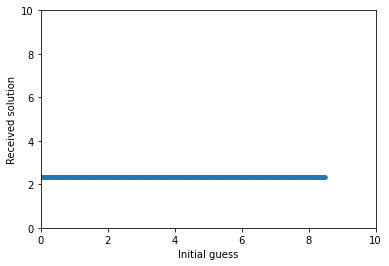

In [8]:
p0s = np.linspace(0, 10, 1029)
pfs = np.zeros(p0s.shape)
for i, p0 in enumerate(p0s):
    try:
        pfs[i] = fixedpoint(g, p0, atol, nitermax=100)
    except ValueError as e:
        pfs[i] = float('inf')
plt.scatter(p0s, pfs, marker=".")
plt.xlabel("Initial guess")
plt.ylabel("Received solution")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

### Exercício 8

> Encontre as raízes da equação
> 
> $$f(x) = 2 \cosh\left(\dfrac{x}{4}\right) − x$$
> 
> utilizando o método da secante.


In [9]:
def secant(f: Callable[[float], float], p0: float, p1: float, atol: float, nitermax: Optional[int]=10):
    n = 1
    q0 = f(p0)
    q1 = f(p1)
    for k in range(nitermax):
        p = p1 - q1 * (p1 - p0) / (q1 - q0)
        n += 1
        if abs(p - p1) < atol:
            return p
        p0 = p1
        q0 = q1
        p1 = p
        q1 = f(p)
    raise ValueError(f"Could not find the solution with tolerance {atol:.2e} with {nitermax} iterations")


In [10]:
def f(x: float) -> float:
    return 2*np.cosh(x/4) - x

p0 = 0
p1 = 4
atol = 1e-4
p = secant(f, p0, p1, atol)
print(f" Initial guess:   p0 = {p0}")
print(f"              :   p1 = {p1}")
print(f"Final solution:    p = {p}")
print(f"     Tolerance: atol = {atol: .1e}")

 Initial guess:   p0 = 0
              :   p1 = 4
Final solution:    p = 2.357551033006328
     Tolerance: atol =  1.0e-04


### Exercicio 9

> Utilizando a função do exercício anterior, compare a convergência para o resultado final obtida pelos 4 métodos:
> * bissecção
> * ponto fixo
> * Newton
> * Secante
> 
> Faça um gráfico de $k \times e_{k}$, com $e_{k} = \left|x^{\star} − x_{k}\right|$ sendo o erro da iteração $k$, comparando os métodos (utilize escala logarítmica para $e_{k}$).
> Comente os seus resultados.
> Considere as duas raízes como sendo
> 
> * $x^{\star} = 2.3575510538774$
> * $x^{\star} = 8.5071995707130$
> 
> e utilize uma tolerância de $10^{−10}$.

### Exercício 10

> Encontre um valor aproximado para $\sqrt{2}$ utilizando o método do ponto fixo.


Encontrar o valor de $\sqrt{2}$ é basicamente encontrar o valor de $x^{\star}$ positivo tal que:

$$
f(x) = x^2 - 2 \ \ \ \ \ \ \ \ \ f(x^{\star}) = 0
$$

Para o método do ponto fixo, podemos pegar $g(x)$ especificamente

$$
g(x) = x - \dfrac{f(x)}{f'(x)} = x - \dfrac{x^2-2}{2x} = \dfrac{x^2+2}{2x}
$$

Como ponto inicial, podemos pegar o próximo valor que queremos encontrar as raizes:

In [11]:
def g(x: float) -> float:
    return (x**2+2)/(2*x)

p0 = 2
p = fixedpoint(g, p0, 1e-7)
print(f" Raiz de 2 = {p}")
print(f"np.sqrt(2) = {np.sqrt(2)}")

 Raiz de 2 = 1.414213562373095
np.sqrt(2) = 1.4142135623730951


### Exercicio 11

> Desenvolva um código para o método da bissecção que verifique se $f(a) \cdot f(b) < 0$ antes de iniciar o processo iterativo e que tenha um limite no número de iterações.
> Se o *loop* alcançar esse limite, o código para e uma mensagem de erro é exibida.
> Coloque todo o método dentro de uma função (do Python), com entradas e saídas de acordo com o algoritmo. 
> Faça alguns testes.


In [12]:
def biseccao(f: Callable[[float], float], a: float, b: float, nitermax: Optional[float] = 40):
    if b <= a:
        raise ValueError(f"The value of b must be greater than a. [a, b] = [{a}, {b}]")
    if atol <= 0:
        raise ValueError(f"The tolerance must be positive!")
    
    fa = f(a)
    fb = f(b)
    if fa*fb > 0:
        raise ValueError("The value of f(a) * f(b) is positive! No root here!")
    for k in range(nitermax):
        p = (a+b)/2
        fp = f(p)
        if fp == 0:  # Happy ending
            return p
        if fa*fp < 0:
            b = p
        else:
            a = p
    raise ValueError(f"Could not find the solution with tolerance {atol:.2e} with {nitermax} iterations")

a, b = 0, 8
def f(x: float) -> float:
    return 2*np.cosh(x/4) - x
xstar = biseccao(f, a, b, 70)
print("solution = ", xstar)

solution =  2.357551053877402


### Exercício 12

> Seja uma função $f$ contínua em um intervalo $\left[a, \ b\right]$, com $f'$ e $f''$ também contínuas
nesse intervalo.
> Considere ainda que existe uma raiz $x^{\star} \in \left[a, \ b\right]$ tal que $f(x^{\star}) = 0$ e $f'(x^{\star}) \ne 0$.
> Nesse caso, mostre que o método de Newton tem convergência de segunda ordem.

### Exercício 13

> Use um polinômio de Taylor em torno de $45 \ ^o$ para aproximar $\cos 41 \ ^o$
com uma precisão de $10^{−6}$.


Temos a expansão em série de Taylor ao redor de $x_0$ é dado por

$$
f(x) = f(x_0) + (x-x_0) \cdot f'(x_0) + \dfrac{1}{2}(x-x_0)^2 \cdot f''(x_0) + \Omega \left(\left(x-x_0\right)^{3}\right)
$$

Para o cosseno, temos que

$$
\cos \theta = \cos \theta_0 - \left(\theta - \theta_0\right) \cdot \sin \theta_0 - \dfrac{1}{2}\left(\theta-\theta_0\right)^2 \cdot \cos \theta_0 + \Omega \left(\left(\theta-\theta_0\right)^{3}\right)
$$

Com $\theta_0 = \dfrac{\pi}{4}$, teremos

$$\cos \theta_0 = \sin \theta_0 = \dfrac{1}{\sqrt{2}}$$

$$
\cos \theta = \dfrac{1}{\sqrt{2}}\left[1 - \left(\theta - \dfrac{\pi}{4}\right) - \dfrac{1}{2}\left(\theta - \dfrac{\pi}{4}\right)^2+ \dfrac{1}{6}\left(\theta - \dfrac{\pi}{4}\right)^3\right]
$$

In [13]:
def cosseno_approx(theta: float) -> float:
    dtheta = theta - (np.pi/4)
    result = 1 - dtheta - (dtheta**2)/2 + (dtheta**3)/6
    return result/np.sqrt(2)

theta = 41 * (np.pi/180)
cos41approx = cosseno_approx(theta)
cos41numpy = np.cos(theta)
error = np.abs(cos41numpy-cos41approx)
print("Nossa aproximacao = %.10f" % cos41approx)
print("      Numpy valor = %.10f" % cos41numpy)
print(" Error = %.3e" % error)

Nossa aproximacao = 0.7547088707
      Numpy valor = 0.7547095802
 Error = 7.095e-07


### Exercicio 14

> Quando um fluido incompressível escoa em um tubo circular, em regime permanente, a queda de pressão $\Delta P$ devido ao atrito com a parede é dada pela equação
> 
> $$\Delta P = -0.5 \ f\rho V^2 \ \left(\dfrac{L}{D}\right)$$
> 
> em que $\rho$ é a densidade do fluido, $V$ é a velocidade média, $L$ é o comprimento do tubo e $D$ é o
diâmetro.
> Na equação (3), $f$ representa o fator de atrito de Darcy.
> Existem diferentes fórmulas empíricas para o fator $f$ em função do número de Reynolds $Re = \dfrac{\rho V D}{\mu}$, em que $\mu$ é a viscosidade dinâmica do fluido.
> Para um escoamento turbulento completamente desenvolvido em um tubo com rugosidade de superfície $\varepsilon$, o modelo desenvolvido por Colebrook é dado por
> 
> $$\dfrac{1}{f^{1/2}} = -2 \cdot \log_{10}\left(\dfrac{\varepsilon/D}{3.7} + \dfrac{2.51}{Re \cdot f^{1/2}}\right)$$
> 
> Desenvolva um método numérico para calcular $f$, dados $\varepsilon/D$ e $Re$.
> Utilize, como chute inicial em suas iterações, o valor aproximado de $f$ dado por Generaux,
> 
> $$f = 0.16 \cdot Re^{-0.16}$$
> 
> Faça um gráfico de $Re \times f$ para $\varepsilon/D = 0.001$, com $10^4 ≤ Re ≤ 10^7$.